In [1]:
%cd ../..

/home/work/AnacondaProjects/combinators


In [2]:
import logging

import probtorch
import torch

from combinators.inference.importance import Importance
from combinators.inference import importance, mcmc
import combinators.model as model
from combinators.model import foldable
import combinators
import combinators.utils as utils

from examples.ssm import ssm

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mu = torch.zeros(1)
sigma = torch.ones(1) / 2
delta = torch.ones(1)
zs = torch.ones(50+1) * -1
zs[0] = 0.0

In [5]:
ssm_initializer = model.Deterministic(zs[0], mu, sigma, delta, batch_shape=tuple())
ssm_step = foldable.Step(ssm.SsmStep(batch_shape=tuple()), initializer=ssm_initializer)
ssm_sequence = foldable.Reduce(ssm_step, generator=lambda: range(zs.shape[0]-1))

In [6]:
_, generative, _ = ssm_sequence()

In [7]:
data = {k: v.value for k, v in generative.variables() if 'X_' in k}

In [8]:
particle_shape = (100,)

In [9]:
ssm_params = {
    'mu': {
        'loc': torch.tensor(0.),
        'scale': torch.tensor(1.),
    },
    'sigma': {
        'loc': torch.tensor(1.),
        'scale': torch.tensor(1.),
    },
    'delta': {
        'loc': torch.tensor(1.),
        'scale': torch.tensor(1.),
    }
}

In [10]:
init_ssm_generative = ssm.InitSsm(params=ssm_params, trainable=False, batch_shape=particle_shape)
init_ssm_proposal = ssm.InitSsm(params=ssm_params, trainable=True, batch_shape=particle_shape)
init_ssm_training = Importance(init_ssm_generative, init_ssm_proposal)

In [11]:
ssm_step_training = foldable.Step(ssm.SsmStep(batch_shape=particle_shape), initializer=init_ssm_training)
ssm_training = foldable.Reduce(ssm_step_training, lambda: range(50))

In [12]:
inference, init_ssm_params, elbos = importance.variational_importance(
    ssm_training, 2000, data, use_cuda=False,
    lr=1e-2, patience=100
)

02/20/2019 22:46:52 ELBO=-2.23982941e+02 at epoch 1
02/20/2019 22:46:52 ELBO=-2.44132263e+02 at epoch 2
02/20/2019 22:46:52 ELBO=-3.44368103e+02 at epoch 3
02/20/2019 22:46:52 ELBO=-5.61805542e+02 at epoch 4
02/20/2019 22:46:52 ELBO=-1.91942474e+02 at epoch 5
02/20/2019 22:46:52 ELBO=-1.94609314e+02 at epoch 6
02/20/2019 22:46:52 ELBO=-2.13417419e+02 at epoch 7
02/20/2019 22:46:52 ELBO=-1.59192749e+02 at epoch 8
02/20/2019 22:46:52 ELBO=-2.31066711e+02 at epoch 9
02/20/2019 22:46:52 ELBO=-1.87905334e+02 at epoch 10
02/20/2019 22:46:52 ELBO=-2.37749344e+02 at epoch 11
02/20/2019 22:46:52 ELBO=-2.03302002e+02 at epoch 12
02/20/2019 22:46:52 ELBO=-1.73702942e+02 at epoch 13
02/20/2019 22:46:52 ELBO=-1.90275940e+02 at epoch 14
02/20/2019 22:46:52 ELBO=-1.66158020e+02 at epoch 15
02/20/2019 22:46:53 ELBO=-1.39341095e+02 at epoch 16
02/20/2019 22:46:53 ELBO=-2.44488358e+02 at epoch 17
02/20/2019 22:46:53 ELBO=-2.14625778e+02 at epoch 18
02/20/2019 22:46:53 ELBO=-2.57482452e+02 at epoch 19
02

Epoch   139: reducing learning rate of group 0 to 5.0000e-03.


02/20/2019 22:47:00 ELBO=-1.71978668e+02 at epoch 144
02/20/2019 22:47:00 ELBO=-3.28369049e+02 at epoch 145
02/20/2019 22:47:00 ELBO=-2.97432678e+02 at epoch 146
02/20/2019 22:47:00 ELBO=-1.92554886e+02 at epoch 147
02/20/2019 22:47:00 ELBO=-1.98052261e+02 at epoch 148
02/20/2019 22:47:00 ELBO=-2.49142624e+02 at epoch 149
02/20/2019 22:47:00 ELBO=-1.99748703e+02 at epoch 150
02/20/2019 22:47:00 ELBO=-1.88250809e+02 at epoch 151
02/20/2019 22:47:00 ELBO=-2.22973358e+02 at epoch 152
02/20/2019 22:47:00 ELBO=-2.17609253e+02 at epoch 153
02/20/2019 22:47:00 ELBO=-2.43135376e+02 at epoch 154
02/20/2019 22:47:00 ELBO=-1.42185211e+02 at epoch 155
02/20/2019 22:47:00 ELBO=-4.01949341e+02 at epoch 156
02/20/2019 22:47:00 ELBO=-1.52282425e+02 at epoch 157
02/20/2019 22:47:01 ELBO=-2.72610718e+02 at epoch 158
02/20/2019 22:47:01 ELBO=-1.91870560e+02 at epoch 159
02/20/2019 22:47:01 ELBO=-2.31564026e+02 at epoch 160
02/20/2019 22:47:01 ELBO=-5.07366943e+02 at epoch 161
02/20/2019 22:47:01 ELBO=-3.

Epoch   240: reducing learning rate of group 0 to 2.5000e-03.


02/20/2019 22:47:05 ELBO=-1.54246796e+02 at epoch 244
02/20/2019 22:47:05 ELBO=-1.89651642e+02 at epoch 245
02/20/2019 22:47:05 ELBO=-2.03317902e+02 at epoch 246
02/20/2019 22:47:05 ELBO=-3.37836670e+02 at epoch 247
02/20/2019 22:47:05 ELBO=-1.42344513e+02 at epoch 248
02/20/2019 22:47:05 ELBO=-1.92174637e+02 at epoch 249
02/20/2019 22:47:05 ELBO=-1.43639420e+02 at epoch 250
02/20/2019 22:47:05 ELBO=-1.62141342e+02 at epoch 251
02/20/2019 22:47:05 ELBO=-2.79066498e+02 at epoch 252
02/20/2019 22:47:05 ELBO=-1.27158577e+02 at epoch 253
02/20/2019 22:47:05 ELBO=-1.83919327e+02 at epoch 254
02/20/2019 22:47:05 ELBO=-2.89717621e+02 at epoch 255
02/20/2019 22:47:05 ELBO=-1.51887665e+02 at epoch 256
02/20/2019 22:47:05 ELBO=-1.94174988e+02 at epoch 257
02/20/2019 22:47:06 ELBO=-4.88866394e+02 at epoch 258
02/20/2019 22:47:06 ELBO=-2.24844635e+02 at epoch 259
02/20/2019 22:47:06 ELBO=-2.56392883e+02 at epoch 260
02/20/2019 22:47:06 ELBO=-1.73678574e+02 at epoch 261
02/20/2019 22:47:06 ELBO=-2.

Epoch   382: reducing learning rate of group 0 to 1.2500e-03.


02/20/2019 22:47:13 ELBO=-2.42129059e+02 at epoch 387
02/20/2019 22:47:13 ELBO=-1.87934952e+02 at epoch 388
02/20/2019 22:47:13 ELBO=-2.97583160e+02 at epoch 389
02/20/2019 22:47:13 ELBO=-1.66758194e+02 at epoch 390
02/20/2019 22:47:13 ELBO=-4.65805054e+02 at epoch 391
02/20/2019 22:47:13 ELBO=-1.87326691e+02 at epoch 392
02/20/2019 22:47:13 ELBO=-3.96573364e+02 at epoch 393
02/20/2019 22:47:13 ELBO=-2.60887634e+02 at epoch 394
02/20/2019 22:47:13 ELBO=-2.59581177e+02 at epoch 395
02/20/2019 22:47:13 ELBO=-2.03779373e+02 at epoch 396
02/20/2019 22:47:14 ELBO=-2.42622498e+02 at epoch 397
02/20/2019 22:47:14 ELBO=-1.99829727e+02 at epoch 398
02/20/2019 22:47:14 ELBO=-2.38900589e+02 at epoch 399
02/20/2019 22:47:14 ELBO=-1.71247665e+02 at epoch 400
02/20/2019 22:47:14 ELBO=-2.39031570e+02 at epoch 401
02/20/2019 22:47:14 ELBO=-2.11577209e+02 at epoch 402
02/20/2019 22:47:14 ELBO=-1.93785095e+02 at epoch 403
02/20/2019 22:47:14 ELBO=-3.61515411e+02 at epoch 404
02/20/2019 22:47:14 ELBO=-2.

Epoch   483: reducing learning rate of group 0 to 6.2500e-04.


02/20/2019 22:47:19 ELBO=-1.76727524e+02 at epoch 488
02/20/2019 22:47:19 ELBO=-2.25912766e+02 at epoch 489
02/20/2019 22:47:19 ELBO=-1.60298019e+02 at epoch 490
02/20/2019 22:47:19 ELBO=-1.95025131e+02 at epoch 491
02/20/2019 22:47:19 ELBO=-1.66855667e+02 at epoch 492
02/20/2019 22:47:19 ELBO=-2.14376266e+02 at epoch 493
02/20/2019 22:47:19 ELBO=-1.75206512e+02 at epoch 494
02/20/2019 22:47:19 ELBO=-1.84924667e+02 at epoch 495
02/20/2019 22:47:19 ELBO=-2.14080124e+02 at epoch 496
02/20/2019 22:47:20 ELBO=-2.12127151e+02 at epoch 497
02/20/2019 22:47:20 ELBO=-2.72180878e+02 at epoch 498
02/20/2019 22:47:20 ELBO=-1.99594467e+02 at epoch 499
02/20/2019 22:47:20 ELBO=-1.87096054e+02 at epoch 500
02/20/2019 22:47:20 ELBO=-1.94764709e+02 at epoch 501
02/20/2019 22:47:20 ELBO=-1.63144577e+02 at epoch 502
02/20/2019 22:47:20 ELBO=-1.78650574e+02 at epoch 503
02/20/2019 22:47:20 ELBO=-2.31551712e+02 at epoch 504
02/20/2019 22:47:20 ELBO=-1.71777512e+02 at epoch 505
02/20/2019 22:47:20 ELBO=-2.

Epoch   584: reducing learning rate of group 0 to 3.1250e-04.


02/20/2019 22:47:26 ELBO=-2.02376053e+02 at epoch 589
02/20/2019 22:47:26 ELBO=-2.18696899e+02 at epoch 590
02/20/2019 22:47:26 ELBO=-2.32655640e+02 at epoch 591
02/20/2019 22:47:26 ELBO=-2.36289536e+02 at epoch 592
02/20/2019 22:47:26 ELBO=-1.82377808e+02 at epoch 593
02/20/2019 22:47:26 ELBO=-1.65847778e+02 at epoch 594
02/20/2019 22:47:27 ELBO=-1.47033569e+02 at epoch 595
02/20/2019 22:47:27 ELBO=-3.83646637e+02 at epoch 596
02/20/2019 22:47:27 ELBO=-1.60301270e+02 at epoch 597
02/20/2019 22:47:27 ELBO=-2.11900818e+02 at epoch 598
02/20/2019 22:47:27 ELBO=-1.67328186e+02 at epoch 599
02/20/2019 22:47:27 ELBO=-2.49908340e+02 at epoch 600
02/20/2019 22:47:27 ELBO=-1.01777168e+02 at epoch 601
02/20/2019 22:47:27 ELBO=-2.51481613e+02 at epoch 602
02/20/2019 22:47:27 ELBO=-2.22561569e+02 at epoch 603
02/20/2019 22:47:27 ELBO=-2.07284958e+02 at epoch 604
02/20/2019 22:47:27 ELBO=-1.60380142e+02 at epoch 605
02/20/2019 22:47:27 ELBO=-5.55331177e+02 at epoch 606
02/20/2019 22:47:27 ELBO=-3.

Epoch   701: reducing learning rate of group 0 to 1.5625e-04.


02/20/2019 22:47:33 ELBO=-1.73884125e+02 at epoch 705
02/20/2019 22:47:33 ELBO=-3.12589691e+02 at epoch 706
02/20/2019 22:47:33 ELBO=-2.21087265e+02 at epoch 707
02/20/2019 22:47:33 ELBO=-1.62967926e+02 at epoch 708
02/20/2019 22:47:34 ELBO=-1.63551392e+02 at epoch 709
02/20/2019 22:47:34 ELBO=-1.99014862e+02 at epoch 710
02/20/2019 22:47:34 ELBO=-1.89838379e+02 at epoch 711
02/20/2019 22:47:34 ELBO=-1.87599503e+02 at epoch 712
02/20/2019 22:47:34 ELBO=-2.78168823e+02 at epoch 713
02/20/2019 22:47:34 ELBO=-1.51534348e+02 at epoch 714
02/20/2019 22:47:34 ELBO=-1.50230225e+02 at epoch 715
02/20/2019 22:47:34 ELBO=-2.16752701e+02 at epoch 716
02/20/2019 22:47:34 ELBO=-2.42785995e+02 at epoch 717
02/20/2019 22:47:34 ELBO=-2.43070312e+02 at epoch 718
02/20/2019 22:47:34 ELBO=-3.17243927e+02 at epoch 719
02/20/2019 22:47:34 ELBO=-2.03900009e+02 at epoch 720
02/20/2019 22:47:34 ELBO=-1.34943970e+02 at epoch 721
02/20/2019 22:47:34 ELBO=-1.96775085e+02 at epoch 722
02/20/2019 22:47:34 ELBO=-1.

Epoch   802: reducing learning rate of group 0 to 7.8125e-05.


02/20/2019 22:47:41 ELBO=-1.04422516e+02 at epoch 807
02/20/2019 22:47:41 ELBO=-1.78972702e+02 at epoch 808
02/20/2019 22:47:41 ELBO=-2.27456070e+02 at epoch 809
02/20/2019 22:47:41 ELBO=-2.22991089e+02 at epoch 810
02/20/2019 22:47:41 ELBO=-1.77500259e+02 at epoch 811
02/20/2019 22:47:41 ELBO=-1.74505478e+02 at epoch 812
02/20/2019 22:47:41 ELBO=-2.11517120e+02 at epoch 813
02/20/2019 22:47:41 ELBO=-1.70614929e+02 at epoch 814
02/20/2019 22:47:41 ELBO=-1.70559769e+02 at epoch 815
02/20/2019 22:47:41 ELBO=-2.58705994e+02 at epoch 816
02/20/2019 22:47:41 ELBO=-1.65017532e+02 at epoch 817
02/20/2019 22:47:41 ELBO=-1.75964813e+02 at epoch 818
02/20/2019 22:47:42 ELBO=-1.96435745e+02 at epoch 819
02/20/2019 22:47:42 ELBO=-1.69924057e+02 at epoch 820
02/20/2019 22:47:42 ELBO=-2.08005173e+02 at epoch 821
02/20/2019 22:47:42 ELBO=-1.91008820e+02 at epoch 822
02/20/2019 22:47:42 ELBO=-2.61133545e+02 at epoch 823
02/20/2019 22:47:42 ELBO=-2.68829407e+02 at epoch 824
02/20/2019 22:47:42 ELBO=-1.

Epoch   903: reducing learning rate of group 0 to 3.9063e-05.


02/20/2019 22:47:48 ELBO=-1.49284836e+02 at epoch 908
02/20/2019 22:47:48 ELBO=-1.95535477e+02 at epoch 909
02/20/2019 22:47:48 ELBO=-1.75602310e+02 at epoch 910
02/20/2019 22:47:48 ELBO=-2.11045517e+02 at epoch 911
02/20/2019 22:47:48 ELBO=-2.54869415e+02 at epoch 912
02/20/2019 22:47:48 ELBO=-1.70140915e+02 at epoch 913
02/20/2019 22:47:48 ELBO=-1.67026779e+02 at epoch 914
02/20/2019 22:47:48 ELBO=-1.72937134e+02 at epoch 915
02/20/2019 22:47:48 ELBO=-1.54140869e+02 at epoch 916
02/20/2019 22:47:48 ELBO=-1.44644012e+02 at epoch 917
02/20/2019 22:47:48 ELBO=-2.10427689e+02 at epoch 918
02/20/2019 22:47:48 ELBO=-2.57747437e+02 at epoch 919
02/20/2019 22:47:48 ELBO=-2.32423584e+02 at epoch 920
02/20/2019 22:47:48 ELBO=-3.05116608e+02 at epoch 921
02/20/2019 22:47:49 ELBO=-1.63238907e+02 at epoch 922
02/20/2019 22:47:49 ELBO=-2.33481079e+02 at epoch 923
02/20/2019 22:47:49 ELBO=-1.90545105e+02 at epoch 924
02/20/2019 22:47:49 ELBO=-1.44699661e+02 at epoch 925
02/20/2019 22:47:49 ELBO=-1.

Epoch  1004: reducing learning rate of group 0 to 1.9531e-05.


02/20/2019 22:47:55 ELBO=-2.14164658e+02 at epoch 1009
02/20/2019 22:47:55 ELBO=-1.92236649e+02 at epoch 1010
02/20/2019 22:47:55 ELBO=-1.74375992e+02 at epoch 1011
02/20/2019 22:47:55 ELBO=-2.10921158e+02 at epoch 1012
02/20/2019 22:47:55 ELBO=-2.14615265e+02 at epoch 1013
02/20/2019 22:47:55 ELBO=-1.63376205e+02 at epoch 1014
02/20/2019 22:47:55 ELBO=-1.75349854e+02 at epoch 1015
02/20/2019 22:47:55 ELBO=-3.10127075e+02 at epoch 1016
02/20/2019 22:47:55 ELBO=-1.93678909e+02 at epoch 1017
02/20/2019 22:47:55 ELBO=-1.83241547e+02 at epoch 1018
02/20/2019 22:47:55 ELBO=-2.11991470e+02 at epoch 1019
02/20/2019 22:47:55 ELBO=-3.14514984e+02 at epoch 1020
02/20/2019 22:47:55 ELBO=-2.00850449e+02 at epoch 1021
02/20/2019 22:47:56 ELBO=-2.89878265e+02 at epoch 1022
02/20/2019 22:47:56 ELBO=-2.53978226e+02 at epoch 1023
02/20/2019 22:47:56 ELBO=-2.55659073e+02 at epoch 1024
02/20/2019 22:47:56 ELBO=-1.59942764e+02 at epoch 1025
02/20/2019 22:47:56 ELBO=-2.98240143e+02 at epoch 1026
02/20/2019

Epoch  1105: reducing learning rate of group 0 to 9.7656e-06.


02/20/2019 22:48:01 ELBO=-2.52425156e+02 at epoch 1109
02/20/2019 22:48:02 ELBO=-1.38427322e+02 at epoch 1110
02/20/2019 22:48:02 ELBO=-2.07255829e+02 at epoch 1111
02/20/2019 22:48:02 ELBO=-3.04231628e+02 at epoch 1112
02/20/2019 22:48:02 ELBO=-1.73961746e+02 at epoch 1113
02/20/2019 22:48:02 ELBO=-2.23576202e+02 at epoch 1114
02/20/2019 22:48:02 ELBO=-2.12812637e+02 at epoch 1115
02/20/2019 22:48:02 ELBO=-1.86217499e+02 at epoch 1116
02/20/2019 22:48:02 ELBO=-2.32468842e+02 at epoch 1117
02/20/2019 22:48:02 ELBO=-2.47993881e+02 at epoch 1118
02/20/2019 22:48:02 ELBO=-1.76703918e+02 at epoch 1119
02/20/2019 22:48:02 ELBO=-1.85566956e+02 at epoch 1120
02/20/2019 22:48:02 ELBO=-2.54004562e+02 at epoch 1121
02/20/2019 22:48:02 ELBO=-2.24598907e+02 at epoch 1122
02/20/2019 22:48:02 ELBO=-2.02225769e+02 at epoch 1123
02/20/2019 22:48:02 ELBO=-1.79491791e+02 at epoch 1124
02/20/2019 22:48:02 ELBO=-2.93207092e+02 at epoch 1125
02/20/2019 22:48:02 ELBO=-1.87004166e+02 at epoch 1126
02/20/2019

Epoch  1206: reducing learning rate of group 0 to 4.8828e-06.


02/20/2019 22:48:08 ELBO=-1.90531647e+02 at epoch 1211
02/20/2019 22:48:08 ELBO=-2.39480103e+02 at epoch 1212
02/20/2019 22:48:08 ELBO=-2.21663284e+02 at epoch 1213
02/20/2019 22:48:08 ELBO=-1.67626328e+02 at epoch 1214
02/20/2019 22:48:08 ELBO=-1.92127731e+02 at epoch 1215
02/20/2019 22:48:09 ELBO=-1.47963409e+02 at epoch 1216
02/20/2019 22:48:09 ELBO=-1.56135223e+02 at epoch 1217
02/20/2019 22:48:09 ELBO=-2.52545609e+02 at epoch 1218
02/20/2019 22:48:09 ELBO=-2.17478088e+02 at epoch 1219
02/20/2019 22:48:09 ELBO=-1.91637390e+02 at epoch 1220
02/20/2019 22:48:09 ELBO=-1.69090439e+02 at epoch 1221
02/20/2019 22:48:09 ELBO=-2.15687759e+02 at epoch 1222
02/20/2019 22:48:09 ELBO=-2.36288681e+02 at epoch 1223
02/20/2019 22:48:09 ELBO=-1.70960434e+02 at epoch 1224
02/20/2019 22:48:09 ELBO=-1.93520767e+02 at epoch 1225
02/20/2019 22:48:09 ELBO=-1.86044479e+02 at epoch 1226
02/20/2019 22:48:09 ELBO=-1.91333817e+02 at epoch 1227
02/20/2019 22:48:09 ELBO=-2.08132156e+02 at epoch 1228
02/20/2019

Epoch  1307: reducing learning rate of group 0 to 2.4414e-06.


02/20/2019 22:48:15 ELBO=-2.20897171e+02 at epoch 1312
02/20/2019 22:48:15 ELBO=-1.72831924e+02 at epoch 1313
02/20/2019 22:48:15 ELBO=-3.21001892e+02 at epoch 1314
02/20/2019 22:48:15 ELBO=-2.33506012e+02 at epoch 1315
02/20/2019 22:48:15 ELBO=-2.62654419e+02 at epoch 1316
02/20/2019 22:48:15 ELBO=-1.67385498e+02 at epoch 1317
02/20/2019 22:48:15 ELBO=-2.39416641e+02 at epoch 1318
02/20/2019 22:48:15 ELBO=-2.22347504e+02 at epoch 1319
02/20/2019 22:48:15 ELBO=-2.52847565e+02 at epoch 1320
02/20/2019 22:48:15 ELBO=-1.37224457e+02 at epoch 1321
02/20/2019 22:48:16 ELBO=-1.92215576e+02 at epoch 1322
02/20/2019 22:48:16 ELBO=-2.51293427e+02 at epoch 1323
02/20/2019 22:48:16 ELBO=-2.65573364e+02 at epoch 1324
02/20/2019 22:48:16 ELBO=-2.06395401e+02 at epoch 1325
02/20/2019 22:48:16 ELBO=-1.81311478e+02 at epoch 1326
02/20/2019 22:48:16 ELBO=-2.39221970e+02 at epoch 1327
02/20/2019 22:48:16 ELBO=-2.44033569e+02 at epoch 1328
02/20/2019 22:48:16 ELBO=-2.45351685e+02 at epoch 1329
02/20/2019

Epoch  1408: reducing learning rate of group 0 to 1.2207e-06.


02/20/2019 22:48:21 ELBO=-2.26636871e+02 at epoch 1413
02/20/2019 22:48:21 ELBO=-2.19235657e+02 at epoch 1414
02/20/2019 22:48:21 ELBO=-3.34847778e+02 at epoch 1415
02/20/2019 22:48:21 ELBO=-3.16766785e+02 at epoch 1416
02/20/2019 22:48:21 ELBO=-1.38079498e+02 at epoch 1417
02/20/2019 22:48:21 ELBO=-2.01867050e+02 at epoch 1418
02/20/2019 22:48:21 ELBO=-3.16202698e+02 at epoch 1419
02/20/2019 22:48:21 ELBO=-1.47773102e+02 at epoch 1420
02/20/2019 22:48:21 ELBO=-1.89853928e+02 at epoch 1421
02/20/2019 22:48:21 ELBO=-2.11407379e+02 at epoch 1422
02/20/2019 22:48:21 ELBO=-1.73585175e+02 at epoch 1423
02/20/2019 22:48:21 ELBO=-2.44324448e+02 at epoch 1424
02/20/2019 22:48:21 ELBO=-2.61306061e+02 at epoch 1425
02/20/2019 22:48:21 ELBO=-1.92035217e+02 at epoch 1426
02/20/2019 22:48:21 ELBO=-3.77112579e+02 at epoch 1427
02/20/2019 22:48:21 ELBO=-2.02123367e+02 at epoch 1428
02/20/2019 22:48:21 ELBO=-2.03889297e+02 at epoch 1429
02/20/2019 22:48:22 ELBO=-3.72789001e+02 at epoch 1430
02/20/2019

Epoch  1509: reducing learning rate of group 0 to 1.0000e-06.


02/20/2019 22:48:29 ELBO=-1.67740906e+02 at epoch 1513
02/20/2019 22:48:29 ELBO=-1.48793503e+02 at epoch 1514
02/20/2019 22:48:29 ELBO=-2.19197281e+02 at epoch 1515
02/20/2019 22:48:29 ELBO=-1.63301743e+02 at epoch 1516
02/20/2019 22:48:29 ELBO=-2.23944366e+02 at epoch 1517
02/20/2019 22:48:29 ELBO=-2.07923935e+02 at epoch 1518
02/20/2019 22:48:29 ELBO=-1.85601746e+02 at epoch 1519
02/20/2019 22:48:29 ELBO=-2.01546738e+02 at epoch 1520
02/20/2019 22:48:29 ELBO=-2.40657333e+02 at epoch 1521
02/20/2019 22:48:29 ELBO=-1.77494034e+02 at epoch 1522
02/20/2019 22:48:29 ELBO=-2.07119858e+02 at epoch 1523
02/20/2019 22:48:29 ELBO=-1.24864212e+02 at epoch 1524
02/20/2019 22:48:29 ELBO=-3.29048065e+02 at epoch 1525
02/20/2019 22:48:29 ELBO=-2.60104736e+02 at epoch 1526
02/20/2019 22:48:29 ELBO=-1.69241760e+02 at epoch 1527
02/20/2019 22:48:30 ELBO=-1.94972488e+02 at epoch 1528
02/20/2019 22:48:30 ELBO=-1.77897064e+02 at epoch 1529
02/20/2019 22:48:30 ELBO=-2.87943451e+02 at epoch 1530
02/20/2019

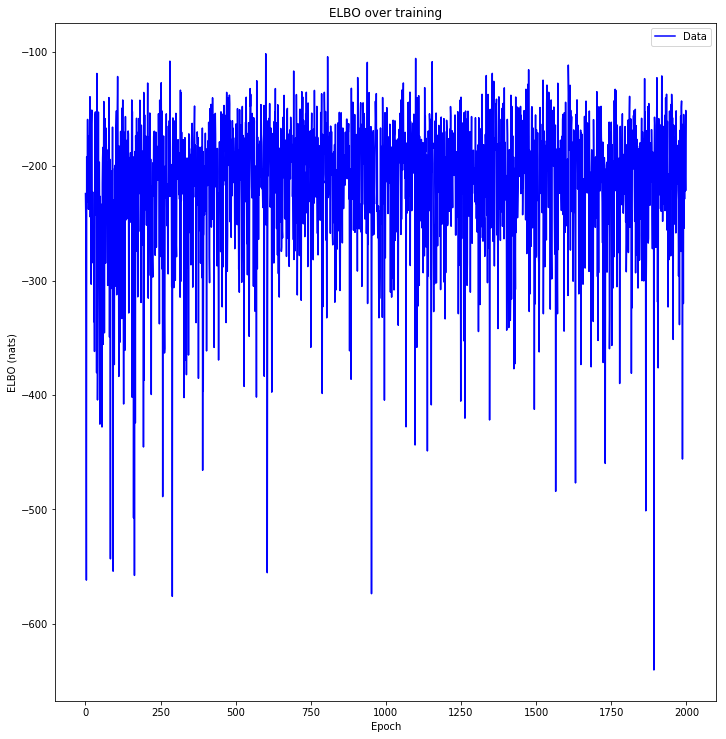

In [13]:
utils.plot_evidence_bounds(elbos)

In [14]:
ssm_smc = mcmc.reduce_resample_move_smc(ssm.SsmStep(batch_shape=particle_shape), lambda: range(50), initializer=init_ssm_proposal, moves=10)

In [15]:
_, inference, _ = ssm_smc(data=data)

In [16]:
for t in range(0, zs.shape[0]-1):
    key = generative.find(lambda k, v: str(t) in k and 'Deterministic' not in k)[0]
    z_t = 'Z_%d' % (t+1)
    accuracy = ((inference[key][z_t].value - utils.optional_to(generative[key][z_t], inference[key][z_t].value))**2).mean()
    print('SMC MSE at time %d: %f' % (t, accuracy))

SMC MSE at time 0: 2.494908
SMC MSE at time 1: 1.254774
SMC MSE at time 2: 0.948945
SMC MSE at time 3: 1.399453
SMC MSE at time 4: 2.242739
SMC MSE at time 5: 1.167377
SMC MSE at time 6: 0.995067
SMC MSE at time 7: 1.905600
SMC MSE at time 8: 1.760489
SMC MSE at time 9: 0.990349
SMC MSE at time 10: 0.783541
SMC MSE at time 11: 2.897727
SMC MSE at time 12: 1.052145
SMC MSE at time 13: 0.638271
SMC MSE at time 14: 0.845538
SMC MSE at time 15: 0.927059
SMC MSE at time 16: 1.596739
SMC MSE at time 17: 1.079018
SMC MSE at time 18: 0.976867
SMC MSE at time 19: 1.093911
SMC MSE at time 20: 2.142013
SMC MSE at time 21: 1.030998
SMC MSE at time 22: 0.611131
SMC MSE at time 23: 2.855417
SMC MSE at time 24: 0.658679
SMC MSE at time 25: 0.999088
SMC MSE at time 26: 0.937986
SMC MSE at time 27: 1.248792
SMC MSE at time 28: 1.666822
SMC MSE at time 29: 1.249525
SMC MSE at time 30: 1.575299
SMC MSE at time 31: 0.720013
SMC MSE at time 32: 0.785619
SMC MSE at time 33: 0.799767
SMC MSE at time 34: 0.98

In [17]:
init_ssm_params

"{'delta__loc': 'tensor(0.9994, grad_fn=<CloneBackward>)', 'delta__scale': 'tensor(0.5572, grad_fn=<CloneBackward>)', 'mu__loc': 'tensor(-0.5065, grad_fn=<CloneBackward>)', 'mu__scale': 'tensor(0.8916, grad_fn=<CloneBackward>)', 'sigma__loc': 'tensor(0.4412, grad_fn=<CloneBackward>)', 'sigma__scale': 'tensor(0.9522, grad_fn=<CloneBackward>)'}"